# Observations for the night February 18th 2021 with red filter

https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with wl_2021_02
- use jupyter kernel LSST
- requires the installation https://github.com/mfisherlevine/summit
- requires to write in file {HOME}/notebooks/.user_setups


- updated with w_2021_10


In [119]:
#!/bin/sh
# This file is expected to be found in ${HOME}/notebooks/.user_setups
#  It is a shell fragment that will be sourced during kernel startup
#  when the LSST kernel is started in a JupyterLab environment.  It runs
#  in the user context and can contain arbitrary shell code.  Exported changes
#  in its environment will persist into the JupyterLab Python environment.

#    setup -j rapid_analysis -r ${HOME}/repos/rapid_analysis
#    setup -j atmospec       -r ${HOME}/repos/atmospec

In [120]:
! eups list -s

Spectractor           LOCAL:/home/dagoret/repos/w_2021_10/Spectractor 	setup
afw                   21.0.0-20-g09baf175d+e1e7d1c708 	current w_2021_10 setup
alert_packet          master-gbd80f2fea6 	current w_2021_10 setup
ap_association        21.0.0-6-gd3e26fa+20a6c0bac9 	current w_2021_10 setup
ap_pipe               21.0.0-10-gf688641+b6798eb8cf 	current w_2021_10 setup
ap_verify             21.0.0-10-ga0af1fc+919a499e71 	current w_2021_10 setup
astro_metadata_translator 0.1.0-22-g86269e8+6691386486 	current w_2021_10 setup
astshim               21.0.0-2-g45278ab+9f51b1e3f7 	current w_2021_10 setup
atmospec              LOCAL:/home/dagoret/repos/w_2021_10/atmospec 	setup
base                  21.0.0-6-g2d4f3f3+9f51b1e3f7 	current w_2021_10 setup
cbp                   21.0.0-2-g143869c+a9f57e981a 	current w_2021_10 setup
coadd_utils           21.0.0-2-g7f82c8f+2c5dd3b4f0 	current w_2021_10 setup
cp_pipe               21.0.0-10-gcf60f90+c974c5881c 	current w_2021_10 setup
ctrl_bps     

In [121]:
# correct for bug in stack in wl_2021_02
%config IPCompleter.use_jedi=False

# Import

In [122]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits

In [123]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

## CONFIGURATION

In [124]:
FLAG_SAVE_IMAGE=True

# Logbook with rapid analysis

In [125]:
from lsst.rapid.analysis.nightReport import NightReporter
repoDir='/project/shared/auxTel'
reporter=NightReporter(repoDir,"2021-02-18")

Loaded data for seqNums 3 to 707


In [126]:
reporter.getObservedObjects()

['HD 164461',
 'HD 34816',
 'HR 4963',
 'HD 114449',
 'HD164461',
 'HD 93521',
 'HD 34950',
 'HD 38553',
 'HD 38666',
 'HD 14943',
 'HD 63214',
 'HR 4468',
 'HD 185975',
 'HD 63077',
 'HD 116009',
 'HR1996',
 'HD 101341',
 'HD 60753',
 'HD 14556',
 'HD 60517']

/home/dagoret/repos/w_2021_10/rapid_analysis/python/lsst/rapid/analysis/nightReport.py:135: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111, polar=True)


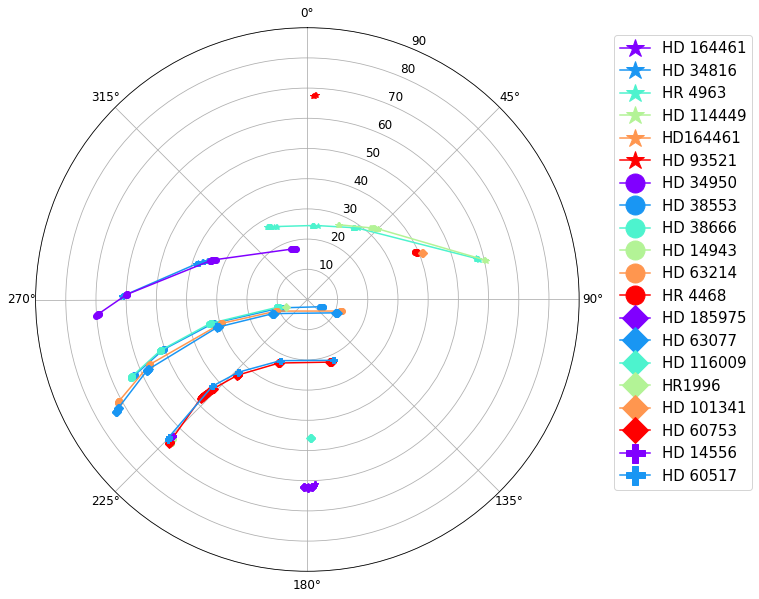

In [127]:
reporter.makePolarPlotForObjects()

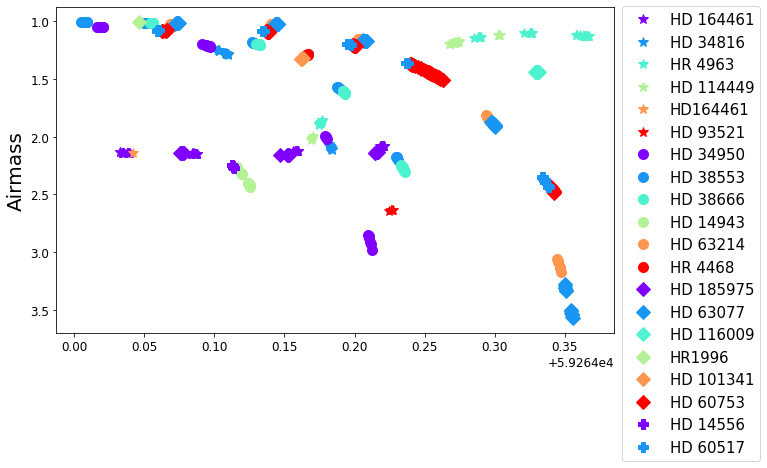

In [128]:
reporter.plotPerObjectAirMass()

In [129]:
reporter.printObsTable()

{seqNum:4} {imageType:9} {obj:10} {timeOfDay} {filt:25} {dt.sec:6.1f}  {expTime:2.2f}
   3 bias      FlatField position 21:31:47.794 RG610~empty                  0.0  0.00
   4 bias      FlatField position 21:33:22.490 RG610~empty                 94.7  0.00
   5 bias      FlatField position 21:33:24.835 RG610~empty                  2.3  0.00
   6 bias      azel_target 22:00:38.288 RG610~empty               1633.5  0.00
   7 bias      azel_target 22:01:16.704 RG610~empty                 38.4  0.00
   8 bias      azel_target 22:01:21.199 RG610~empty                  4.5  0.00
   9 bias      azel_target 22:01:25.700 RG610~empty                  4.5  0.00
  10 bias      azel_target 22:01:30.226 RG610~empty                  4.5  0.00
  11 bias      azel_target 22:01:34.726 RG610~empty                  4.5  0.00
  12 bias      azel_target 22:01:39.217 RG610~empty                  4.5  0.00
  13 bias      azel_target 22:01:43.713 RG610~empty                  4.5  0.00
  14 bias      azel_targ

# Butler

In [130]:
butler=dafPersist.Butler("/project/shared/auxTel")

In [131]:
dayObs="2021-02-18"

In [132]:
imageName="HD114449"
filt1="RG610"
filt2="empty"

In [133]:
#all_myseq_RG610_holo4_003=range(556,565)
#all_myseq_empty_holo4_003=range(566,589)
all_myseq_RG610_holo4_003_2=range(590,595)

In [134]:
all_myseq=all_myseq_RG610_holo4_003_2

In [135]:
seqNum=all_myseq[0]

# Display

In [136]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug1_2021_02_18',url=os.environ["FIREFLY_URL"])

In [137]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [138]:
display1.mtv(raw)

In [139]:
display1.getClient().display_url()

# Meta Query to the Butler

In [140]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[3, 4, 5, 6, 7, 10, 11, 9, 8, 14, 15, 12, 16, 13, 19, 17, 21, 20, 18, 22, 28, 24, 23, 26, 27, 25, 31, 32, 29, 33, 34, 30, 35, 41, 36, 39, 38, 37, 40, 46, 42, 47, 45, 43, 44, 48, 52, 51, 50, 53, 54, 49, 56, 55, 57, 59, 58, 60, 61, 62, 64, 63, 65, 66, 67, 70, 68, 69, 76, 71, 73, 72, 74, 75, 77, 81, 82, 79, 80, 78, 86, 87, 83, 84, 85, 91, 88, 92, 90, 89, 97, 96, 98, 94, 93, 95, 100, 106, 99, 105, 101, 107, 102, 103, 104, 108, 109, 110, 111, 113, 112, 116, 115, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223

In [141]:
seqNums=butler.queryMetadata('raw','seqNum',dayObs=dayObs)

In [142]:
%config IPCompleter.use_jedi=False

## Butler Query meta data

In [143]:
ids=butler.queryMetadata('raw',["dayObs", "seqNum"],object='HD 114449')

In [144]:
count=0
for dataid in ids:
    print(dataid)
    count+=1
    if count > 20:
        break

('2021-02-18', 414)
('2021-02-18', 415)
('2021-02-18', 416)
('2021-02-18', 417)
('2021-02-18', 590)
('2021-02-18', 591)
('2021-02-18', 592)
('2021-02-18', 593)
('2021-02-18', 594)
('2021-02-18', 595)
('2021-02-18', 596)
('2021-02-18', 597)
('2021-02-18', 598)
('2021-02-18', 599)
('2021-02-18', 600)
('2021-02-18', 601)
('2021-02-18', 602)
('2021-02-18', 629)
('2021-02-18', 630)
('2021-02-18', 631)
('2021-02-18', 632)


# Exp 

In [145]:
#exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

In [146]:
#display1.mtv(exp)

In [147]:
#fig=plt.figure(figsize=(20,5))
#ax1=fig.add_subplot(131)
#ax1.imshow(exp.image.array,origin="lower",cmap="jet")
#ax2=fig.add_subplot(132)
#ax2.imshow(exp.mask.array,origin="lower",cmap="jet")
#ax3=fig.add_subplot(133)
#ax3.imshow(exp.variance.array,origin="lower",cmap="jet")

In [148]:
#exp.image.array.shape

In [149]:
#raw.image.array.shape

## Meta Data

In [150]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [151]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'COMMENT': ["  FITS (Flexible Image Transport System) format is defined in 'Astronomy",
  "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H",
  "= '        '",
  '---- Date, night and basic image information ----',
  "= '        '",
  '---- Telescope info, location, observer ----',
  "= '        '",
  '---- Pointing info, etc. ----',
  "= '        '",
  '---- TAN Projection ----',
  "= '        '",
  '---- Image-identifying used to build OBS-ID ----',
  "= '        '",
  '---- Test Stand information ----',
  "= '        '",
  '---- Information from Camera (Common block) ----',
  "= '        '",
  '---- Information from Camera ----',
  "= '        '",
  '---- Filter/grating information ----',
  "= '        '",
  '---- Exposure-related information ----',
  "= '        '",
  '---- Weather information ----',
  "= '        '",
  '---- Header information ----',
  "= '        '",
  '---- Checksums ----',
  '---- Information from Camera

# Start to work on raw images with Red filter

In [152]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [153]:
len(all_myseq)

5

In [154]:
all_my_raw_array=[]
all_my_header=[]
for seqNum in all_myseq:
    raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    all_my_raw_array.append(np.copy(raw.image.array))
    all_my_header.append(md.toDict())

In [155]:
Ncol=2
Nrow=3
Ntot=Ncol*Nrow

In [156]:
%matplotlib inline

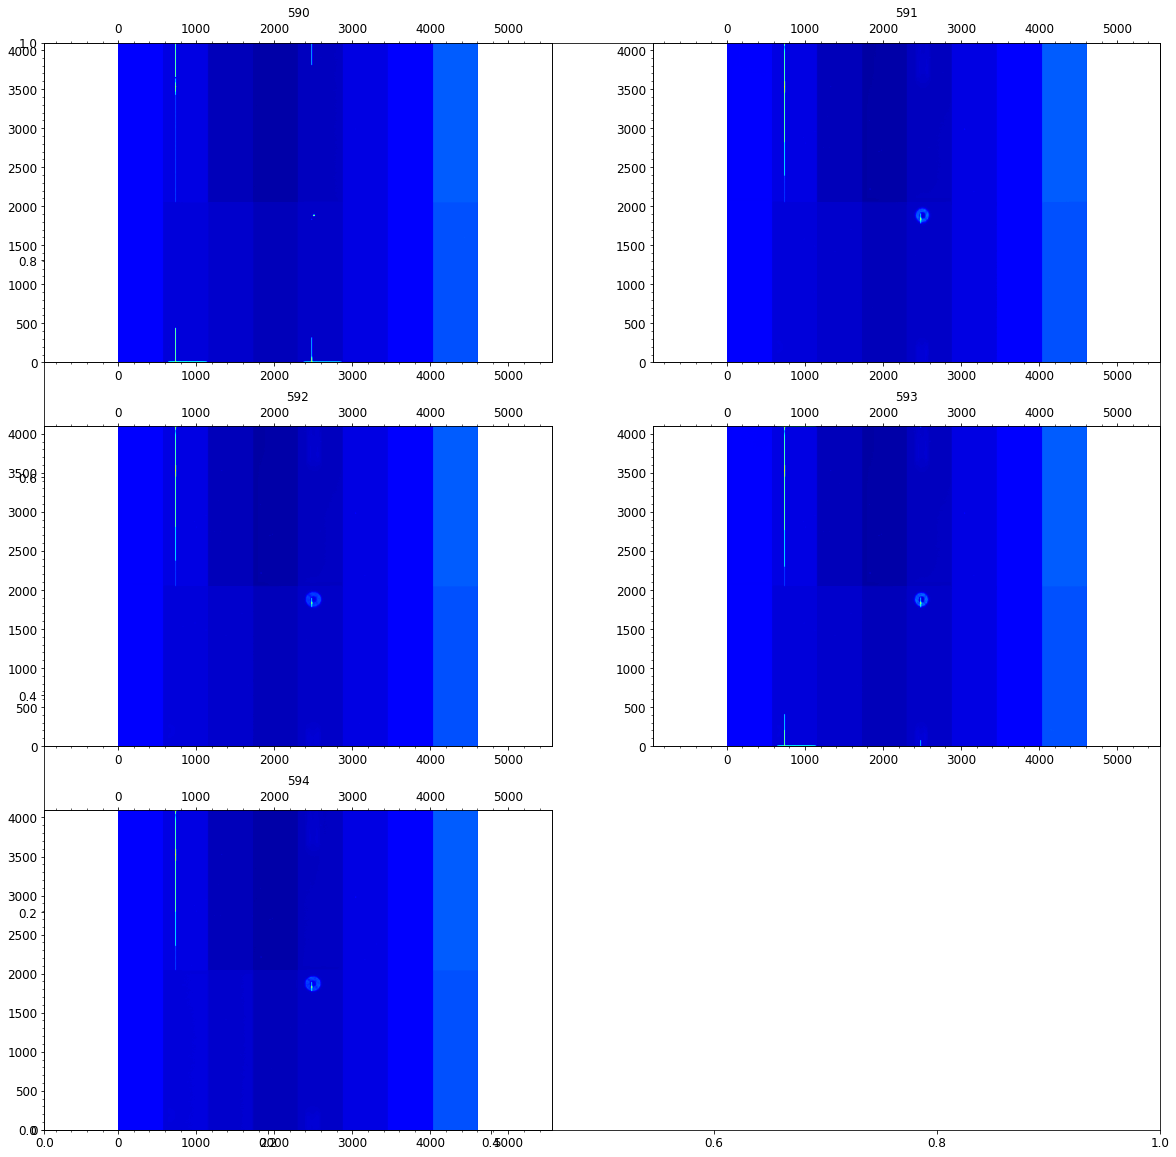

In [157]:
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)
# loop on angle
for idx in np.arange(Ntot):
    if idx>=len(all_my_raw_array):
        break
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx])
    
    ax.minorticks_on()
    
    ax2=ax.twiny()
    ax2.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax2.set_xlim(ax.get_xlim())
    ax2.minorticks_on()
    
    #ax.tick_params(which='major', length=10, width=2, direction='inout')
    #ax.tick_params(which='minor', length=5, width=2, direction='inout')
    #ax.grid(which='both')



    #ax.set_aspect('equal')

    #x1, x2 = ax.get_xlim() 
    #y1, y2 = ax.get_ylim() 


In [158]:
if FLAG_SAVE_IMAGE:
    idx=0
    for seqNum in all_myseq:
        filename="holo4_003"+"_"+filt1+"_"+imageName+"_"+dayObs+"_"+str(seqNum)+".fits"
        print(filename)
    
        hdr = fits.Header()
    
        for key,value in all_my_header[idx].items():
            hdr[str(key)]=value
        
        hdu = fits.PrimaryHDU(data=all_my_raw_array[idx],header=hdr)  # with headers
        #hdu = fits.PrimaryHDU(data=all_my_raw_array[idx])
    
        hdul = fits.HDUList([hdu])
    
        hdul.writeto(filename,overwrite=True)
    
        idx+=1

holo4_003_RG610_HD114449_2021-02-18_590.fits
holo4_003_RG610_HD114449_2021-02-18_591.fits
holo4_003_RG610_HD114449_2021-02-18_592.fits
holo4_003_RG610_HD114449_2021-02-18_593.fits
holo4_003_RG610_HD114449_2021-02-18_594.fits
